
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 0. MLP for regression (*)

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

&nbsp; a) Load the mpg dataset using seaborn. (*)

&nbsp; b) Use your data analysis skills to perform EDA. (*)

&nbsp; c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

&nbsp; d) Can you figure out a way to see if the values filled in are reasonable? (**)

&nbsp; e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

&nbsp; g) Now use early stopping to tune the number of epochs. (*)

&nbsp; h) Train on all training data and validation data. (*)

&nbsp; i) Predict on test data and evaluate. (*)

&nbsp; j) Can you create an MLP model that beats random forest for this dataset? (**)

<details>

<summary>Hint</summary>

d) Perhaps some statistical analysis and visual comparison of similar samples? Also combine with domain skills. 

f) Decide how to do systematic testing and document them.

j) Don't forget about classical machine learning models that we learned in the last course, in many cases they can outperform neural networks. You need to pick the right model for the right problem.

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [2]:
# a) Loada datasetet
data = sns.load_dataset('mpg')

In [3]:
# b) Gör en EDA DAAAÅÅ
display(data.head(35))
display(data.describe())
display(data.info())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


None

<Axes: ylabel='Frequency'>

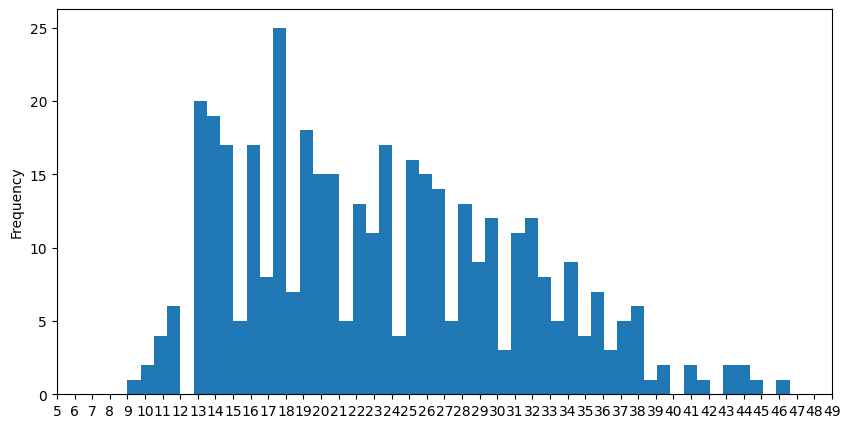

In [4]:
data['mpg'].plot(kind='hist', bins=50, xticks=range(5, 50), figsize=(10, 5))

In [5]:
# b) fortsättning
# ax, fig = plt.subplots(figsize=(10, 10))
# sns.pairplot(data)

In [6]:
from sklearn.impute import KNNImputer

In [7]:
# c) fyll i saknade värden med en ML model, imputation
df = data.copy().drop(columns=['name'])
df = pd.get_dummies(df, columns=['origin', 'model_year', 'cylinders'], drop_first=True)

# gör en dict för att se vilka de ursprungliga värdena var
org_hp = df['horsepower']
org_hp = dict(enumerate(org_hp))

In [8]:
imputed_hp = KNNImputer(n_neighbors=2).fit_transform(df[['horsepower']]).round(0)
# imputed_hp = dict(enumerate(imputed_hp))
compared = {k: (org_hp[k], imputed_hp[k]) for k in org_hp}

In [9]:
df = df.assign(horsepower=imputed_hp)
df

,mpg,displacement,horsepower,weight,acceleration,origin_japan,origin_usa,model_year_71,model_year_72,model_year_73,...,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,307.0,130.0,3504,12.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,15.0,350.0,165.0,3693,11.5,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,18.0,318.0,150.0,3436,11.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,16.0,304.0,150.0,3433,12.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,17.0,302.0,140.0,3449,10.5,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
394,44.0,97.0,52.0,2130,24.6,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
395,32.0,135.0,84.0,2295,11.6,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
396,28.0,120.0,79.0,2625,18.6,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [10]:
# e) gör train|test|val split
from sklearn.model_selection import train_test_split

x, y = df.drop(['mpg'], axis=1), df['mpg'].round(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
# x_train, x_test, x_val = np.array(x_train), np.array(x_test), np.array(x_val)
# y_train, y_test, y_val = np.array(y_train), np.array(y_test), np.array(y_val)

In [13]:
x_train[0]

array([-0.7677044 , -0.37423727, -0.46712406, -0.55724874, -0.49212549,
       -1.32861484, -0.27262488, -0.25906388,  2.93876907, -0.28571429,
       -0.29210312, -0.29210312, -0.28571429, -0.30460385, -0.27262488,
       -0.29210312, -0.27262488, -0.27922411,  0.96903271, -0.07955573,
       -0.5068698 , -0.60399244])

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((318, 22), (80, 22), (318,), (80,))

In [15]:
# f) skapa en MLP
from keras import Sequential, layers, losses, callbacks

nn_model = Sequential([
    # layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
])

In [16]:
nn_model.compile(optimizer='adam', metrics=['mae'], loss=['mse'])

In [17]:
nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[callbacks.EarlyStopping(patience=5)])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 579.3835 - mae: 22.5444 - val_loss: 433.5188 - val_mae: 19.4607
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 359.6734 - mae: 17.6560 - val_loss: 239.3651 - val_mae: 13.9455
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 171.1604 - mae: 11.5021 - val_loss: 70.3472 - val_mae: 6.7119
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.8670 - mae: 5.4197 - val_loss: 15.9558 - val_mae: 3.3173
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.7371 - mae: 3.9843 - val_loss: 20.8584 - val_mae: 3.7817
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.4667 - mae: 4.0629 - val_loss: 9.7479 - val_mae: 2.3616
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.7242 - mae: 2.6743 - val_loss: 10.8337 - val_mae: 2.3017
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.1451 - mae: 2.5731 - val_loss: 8.9192 - val_mae: 2.0534
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [18]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,813 (843.02 KB)

 Trainable params: 71,937 (281.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 143,876 (562.02 KB)

In [19]:
nn_model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7411 - mae: 1.8962 


[6.527425289154053, 1.9149186611175537]

In [20]:
def plot(y_true, y_pred, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.7, color='blue', edgecolor='k', label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2, label='Ideal Fit (y=x)')
    plt.xlabel('Actual MPG (y_test)')
    plt.ylabel('Predicted MPG (y_pred)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


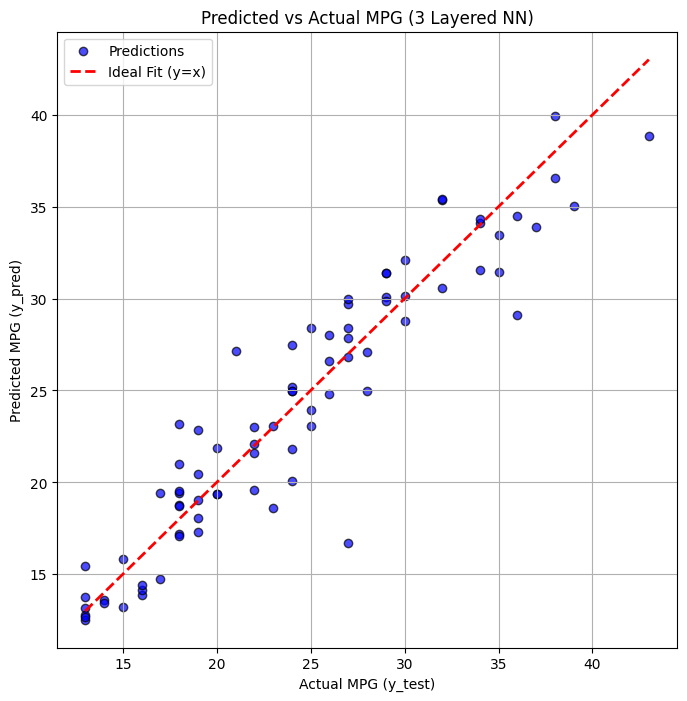

In [21]:
y_pred = nn_model.predict(x_test)

plot(y_test, y_pred, 'Predicted vs Actual MPG (3 Layered NN)')

compared = pd.DataFrame({'pred': y_pred.flatten(), 'true': y_test})
# compared

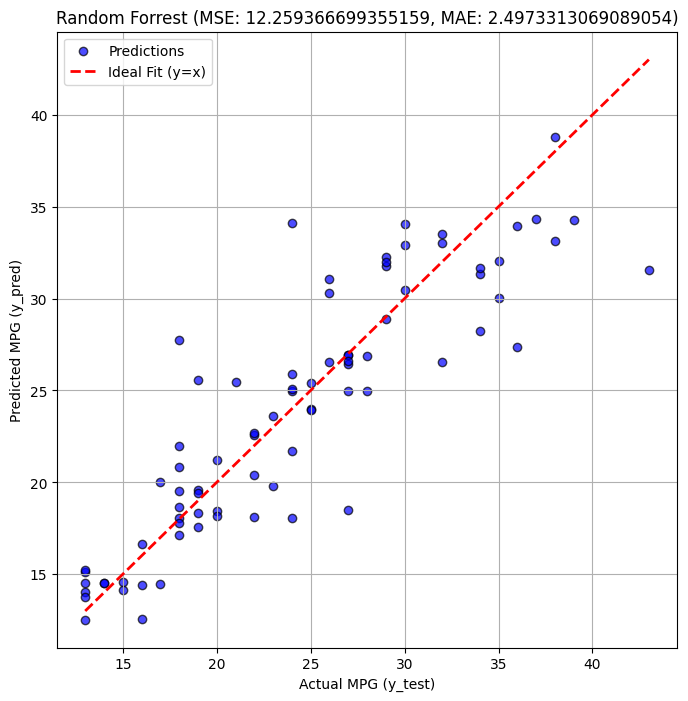

In [22]:
# j) försöka slå random forrest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_model.fit(x_train, y_train)

rf_model_pred = rf_model.predict(x_test)

rf_model_mse = losses.mean_squared_error(y_test, rf_model_pred)
rf_model_mae = losses.mean_absolute_error(y_test, rf_model_pred)

plot(y_test, rf_model_pred, f'Random Forrest (MSE: {rf_model_mse}, MAE: {rf_model_mae})')

In [34]:
def compare_models(model1, model2, x_test, y_test):
    model1_pred = model1.predict(x_test)
    model2_pred = model2.predict(x_test)

    model1_mse = losses.mean_squared_error(y_test, model1_pred)
    model2_mse = losses.mean_squared_error(y_test, model2_pred)

    model1_mae = losses.mean_absolute_error(y_test, model1_pred)
    model2_mae = losses.mean_absolute_error(y_test, model2_pred)

    print(f'{model1} \nMSE: \n{model1_mse}, \nMAE: {model1_mae}\n')
    print(f'{model2} \nMSE: \n{model2_mse}, \nMAE: {model2_mae}')

In [35]:
compare_models(nn_model, rf_model, x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
<Sequential name=sequential, built=True> 
MSE: 
[2.6702026e+01 1.0752478e+00 2.0866518e+00 2.1321766e+00 7.4378877e+00
 1.4458396e+00 6.1577564e-01 2.2071760e+00 2.8637657e-02 1.4495207e+00
 9.1563135e-01 1.4949888e+01 1.1472149e+00 5.1526074e+00 4.2873111e-01
 5.9630260e-02 6.0486096e-01 6.9562221e-01 3.8186097e+00 1.1564757e+00
 2.9026620e+00 2.1508162e+00 3.5173919e+00 9.1192503e+00 9.1697150e-01
 9.3135281e+00 1.0579213e+02 1.5141742e-01 7.8317476e-03 2.1126645e+00
 6.0447097e+00 1.7461561e+01 4.7767738e+01 9.6275473e+00 6.7251521e-01
 4.8154702e+00 5.7235265e+00 2.1848378e-01 1.8394765e-01 1.0755277e-01
 3.7649601e+01 5.4566491e-01 1.7712699e-02 1.2104755e+01 6.0811071e+00
 5.7108388e+00 8.7909546e+00 4.0895615e-02 1.5445217e+01 3.7045794e+00
 1.2842264e+01 5.7423239e+00 7.8625321e-01 1.1408760e-01 3.6332000e-03
 2.2947032e-03 8.6468065e-01 4.2632166e-01 7.7244267e-03 2.3091316e+00
 3.7630340e-01 4.4554195e+00 1.3895259e+00 8.8725513e-01 1.940

## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---